넷플릭스 영화 평점 데이터

17,770개 영화<br>
480,189명 유저<br>
100,480,507개 평점<br>

이 중 일부만 추출해 사용<br>
<br>
평점 데이터를 불러온다

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [6]:
data_path = 'combined_data_small.txt'

data = {
    'movie_id': [],
    'user_id': [],
    'rating': [],
    'date': []
}
with open(data_path) as f:
    for line in tqdm(f.readlines()):
        line = line.strip()
        if line.endswith(':'):
            movie_id = line.strip(':')
            continue
        else:
            user_id, rating, date = line.split(',')
        data['movie_id'].append(movie_id)
        data['user_id'].append(user_id)
        data['rating'].append(float(rating))
        data['date'].append(date)

df = pd.DataFrame.from_dict(data)
del data

100%|████████████████████████████████████████████████████████████████████| 5011199/5011199 [00:07<00:00, 643209.15it/s]


In [7]:
df

,movie_id,user_id,rating,date
0,1,1488844,3.0,2005-09-06
1,1,822109,5.0,2005-05-13
2,1,885013,4.0,2005-10-19
3,1,30878,4.0,2005-12-26
4,1,823519,3.0,2004-05-03
...,...,...,...,...
5010194,1000,1954284,5.0,2005-05-04
5010195,1000,299636,2.0,2005-10-27
5010196,1000,1635449,1.0,2005-01-10
5010197,1000,906984,4.0,2005-05-13


영화 제목 테이블을 불러온다

In [8]:
title_path = 'movie_titles.csv'

df_title = pd.read_csv(title_path, encoding='ISO-8859-1', header=None, names=['Movie_Id', 'Year', 'Name'])
df_title['Movie_Id'] = df_title['Movie_Id'].astype(str)
df_title.set_index('Movie_Id', inplace=True)

In [9]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


평점 분포를 살펴본다

<AxesSubplot:xlabel='rating', ylabel='count'>

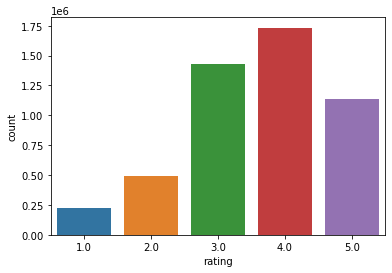

In [10]:
sns.countplot(x=df['rating'])

4점이 가장 많다

영화의 총개수

In [11]:
df['movie_id'].nunique()

1000

유저의 수

In [12]:
df['user_id'].nunique()

404555

평가 개수가 100개 이하인 영화는 제외한다

In [19]:
min_movie_ratings = 100
filter_movies = df['movie_id'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

50개 이하로 평가한 유저는 제외한다

In [21]:
min_user_ratings = 50
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

In [23]:
df_filtered = df[(df['movie_id'].isin(filter_movies)) & (df['user_id'].isin(filter_users))]

In [24]:
del filter_movies, filter_users, min_movie_ratings, min_user_ratings

In [25]:
df_filtered

,movie_id,user_id,rating,date
0,1,1488844,3.0,2005-09-06
3,1,30878,4.0,2005-12-26
7,1,1248029,3.0,2004-04-22
19,1,372233,5.0,2005-11-23
20,1,1080361,3.0,2005-03-28
...,...,...,...,...
5010184,1000,1534085,4.0,2004-08-26
5010189,1000,1644520,2.0,2005-06-08
5010192,1000,965381,1.0,2005-09-04
5010196,1000,1635449,1.0,2005-01-10


학습 데이터와 테스트 데이터로 나눈다

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_train, df_test = train_test_split(df_filtered)

In [28]:
del df_filtered

평점 데이터를 피봇 해서(유저 수 X 영화 수)의 행렬로 만든다<br>
대부분의 값이 None이므로 sparse 행렬이 된다

In [29]:
df_p = pd.pivot_table(df_train, index='user_id', columns='movie_id', values='rating')

In [30]:
df_p

movie_id,1,10,1000,101,102,103,104,105,106,107,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
1000192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1000387,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
999378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 인기 기반 추천

모든 영화의 평균 평점을 계산한다

In [33]:
ratings_mean = df_p.mean(axis=0).sort_values(ascending=False).rename('mean rating').to_frame()
ratings_mean

,mean rating
movie_id,
13,4.769231
316,4.230216
753,4.176471
85,4.157895
872,4.149068
...,...
428,1.666667
53,1.656250
151,1.612903


모든 영화의 평점 개수를 구한다

In [34]:
ratings_count = df_p.count(axis=0).rename('num of ratings').to_frame()
ratings_count

,num of ratings
movie_id,
1,128
10,53
1000,176
101,66
102,66
...,...
995,26
996,1648
997,70


평균 평점, 평점 개수, 영화 제목을 하나의 데이터 프레임으로 합친다

In [37]:
ratings_with_title = ratings_mean.join(ratings_count).join(df_title.drop('Year', axis=1))
ratings_with_title

,mean rating,num of ratings,Name
movie_id,,,
13,4.769231,13,Lord of the Rings: The Return of the King: Ext...
316,4.230216,556,Futurama: Monster Robot Maniac Fun Collection
753,4.176471,17,Mary Poppins: Bonus Material
85,4.157895,38,Elfen Lied
872,4.149068,3381,Seven Samurai
...,...,...,...
428,1.666667,33,Barney: Barney's Colorful World: Live
53,1.656250,32,The Bonesetter
151,1.612903,31,Sleepover Nightmare


테스트 데이터에 대해 예측값을 구한다

In [62]:
df_prediction = df_test.set_index('movie_id').join(ratings_mean)[['rating', 'mean rating']]
df_prediction

,rating,mean rating
movie_id,,
1,2.0,3.585938
1,4.0,3.585938
1,3.0,3.585938
1,4.0,3.585938
1,5.0,3.585938
...,...,...
999,1.0,2.677033
999,3.0,2.677033
999,3.0,2.677033


RMSE를 계산한다

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [70]:
y_true = df_prediction['rating']
y_pred = df_prediction['mean rating']
rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
rmse

1.0297287676941602

가장 평점이 높은 n개의 영화를 뽑는다

In [71]:
n = 10
ratings_with_title.head(n)

,mean rating,num of ratings,Name
movie_id,,,
13,4.769231,13,Lord of the Rings: The Return of the King: Ext...
316,4.230216,556,Futurama: Monster Robot Maniac Fun Collection
753,4.176471,17,Mary Poppins: Bonus Material
85,4.157895,38,Elfen Lied
872,4.149068,3381,Seven Samurai
752,4.135948,1861,Star Trek: The Next Generation: Season 7
577,4.119077,823,The Twilight Zone: Vol. 36
634,4.117816,348,Christmas with The Simpsons
223,4.116270,2692,Chappelle's Show: Season 1


평가한 개수가 적을 수록 평점 평균이 왜곡되기 쉽다

# 상품 중심 협업 필터링으로 비슷한 상품 찾기

평점 데이터를 기반으로 주어진 상품과 비슷한 상품을 찾고,<br>
그 상품들의 평점을 이용해 상품의 평점을 예측하는 것을 상품 기반 협업 필터링이라고 부른다<br>
<br>
유저-영화 행렬에서 비어 있는 값을 유저의 평균 평점으로 채운다

In [72]:
df_p_imputed = df_p.T.fillna(df_p.mean(axis='columns')).T
df_p_imputed

movie_id,1,10,1000,101,102,103,104,105,106,107,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
1000192,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,...,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455,3.145455
1000301,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,...,3.476190,3.476190,3.476190,3.476190,3.476190,3.476190,2.000000,3.476190,3.476190,3.476190
1000387,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143,3.000000,3.057143,3.057143,3.057143,...,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143,3.057143
1000410,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,...,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842,3.236842
1000527,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,...,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.358974,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998862,3.511111,3.511111,3.511111,3.511111,3.511111,3.511111,3.511111,3.511111,3.511111,3.511111,...,3.511111,3.511111,3.511111,3.511111,3.000000,3.511111,3.511111,3.511111,3.511111,3.511111
999378,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,...,3.196078,3.196078,3.000000,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078,3.196078
99939,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,...,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632,3.052632


두 영화의 평점 분포가 비슷한지 계산은 코사인 유사도(cosine similarity)로 한다<br>
이를 위해 코사인 유사도 함수를 불러온다

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

유저-영화 행렬을 영화-유저 행렬로 전치(transpose) 한다

In [75]:
df_p_imputed_T = df_p_imputed.T

비슷한 n개의 영화를 통해 예측한다

모든 영화에 대해 예측하기 전에, 예시로 한 영화에 대해 협업 필터링을 적용해 보자

In [76]:
movie_id = '13'

In [78]:
df_p_imputed_T.loc[[movie_id]]

user_id,1000192,1000301,1000387,1000410,1000527,1000634,1000710,1000779,1000851,1001004,...,998236,99844,998502,998506,99865,998862,999378,99939,999456,999504
movie_id,,,,,,,,,,,,,,,,,,,,,
13,3.145455,3.47619,3.057143,3.236842,3.358974,3.612245,3.847826,3.174603,2.92,3.457143,...,3.687023,4.145161,3.018519,3.155556,3.695652,3.511111,3.196078,3.052632,3.75,3.096154


이 영화의 평점 분포와 다른 모든 영화의 평점 분포를 비교하여 유사도를 구한다

In [80]:
similarities = cosine_similarity(df_p_imputed_T.loc[[movie_id]], df_p_imputed_T)
similarities = pd.Series(similarities[0], index=df_p_imputed_T.index)
similarities

movie_id
1       0.999579
10      0.999810
1000    0.999402
101     0.999757
102     0.999665
          ...   
995     0.999735
996     0.994510
997     0.999782
998     0.999660
999     0.998658
Length: 944, dtype: float64

자기 자신과의 유사도는 1일 수밖에 없다

In [81]:
similarities[[movie_id]]

movie_id
13    1.0
dtype: float64

유사도 목록에서 자기 자신을 제외한다

In [82]:
similarities.drop(index=movie_id, inplace=True)

가장 유사한 n개의 영화를 뽑느다

In [88]:
n_similar_movies = 10

In [89]:
n_similarities = similarities.sort_values(ascending=False)[:n_similar_movies]
n_similarities

movie_id
193    0.999922
888    0.999921
176    0.999913
2      0.999909
221    0.999906
520    0.999905
34     0.999904
970    0.999903
744    0.999899
976    0.999899
dtype: float64

테스트 데이터에서 주어진 movie_id와 관련된 행들을 가져온다<br>
예측해야 하는 대상이다

In [90]:
unrated_users = df_test.loc[df_test['movie_id'] == movie_id, 'user_id']
unrated_users

21195    2118461
21126    1232194
21188    2480001
21206     935453
21148    2282493
21163     834131
21219      21823
Name: user_id, dtype: object

유사 영화에 대해 해당 유저들이 어떻게 평가했는지 가져온다

In [93]:
n_ratings = df_p_imputed_T.loc[n_similarities.index, unrated_users]
n_ratings

user_id,2118461,1232194,2480001,935453,2282493,834131,21823
movie_id,,,,,,,
193,4.134583,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
888,4.134583,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
176,4.000000,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
2,4.000000,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
221,4.000000,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
520,4.134583,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
34,4.134583,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
970,4.134583,4.195122,2.829787,3.84,3.571429,3.289855,3.378378
744,4.000000,4.195122,2.829787,3.84,3.571429,3.289855,3.378378


각 유저가 다른 영화에 대해 평가한 평점을 유사도를 이용해 가중 평균한다

In [94]:
weighted_n_ratings = n_ratings.multiply(n_similarities, axis='index')
scores = weighted_n_ratings.sum(axis='index') / n_similarities.sum()
scores

user_id
2118461    4.080750
1232194    4.195122
2480001    2.829787
935453     3.840000
2282493    3.571429
834131     3.289855
21823      3.378378
dtype: float64

이렇게 구한 점수가 해당 영화의 예측 평점이 된다

In [95]:
scores.rename('prediction').reset_index().assign(movie_id=movie_id)

,user_id,prediction,movie_id
0,2118461,4.080750,13
1,1232194,4.195122,13
2,2480001,2.829787,13
3,935453,3.840000,13
4,2282493,3.571429,13
5,834131,3.289855,13
6,21823,3.378378,13


이제 테스트 데이터의 모든 영화에 같은 과정을 반복해보자

In [96]:
movie_scores_dfs = []
for movie_id in tqdm(df_test['movie_id'].unique()):
    similarities = cosine_similarity(df_p_imputed_T.loc[[movie_id]], df_p_imputed_T)
    similarities = pd.Series(similarities[0], index=df_p_imputed_T.index)
    similarities.drop(index=movie_id, inplace=True)
    n_similarities = similarities.sort_values(ascending=False)[:n_similar_movies]
    
    unrated_users = df_test.loc[df_test['movie_id'] == movie_id, 'user_id']
    n_ratings = df_p_imputed_T.loc[n_similarities.index, unrated_users]
    weighted_n_ratings = n_ratings.multiply(n_similarities, axis='index')
    scores = weighted_n_ratings.sum(axis='index') / n_similarities.sum()
    scores_df = scores.rename('prediction').reset_index().assign(movie_id=movie_id)
    movie_scores_dfs.append(scores_df)

100%|████████████████████████████████████████████████████████████████████████████████| 944/944 [02:12<00:00,  7.13it/s]


예측한 결과를 하나의 테이블로 합친다

In [98]:
df_pred_movie = pd.concat(movie_scores_dfs).set_index(['user_id', 'movie_id'])
df_pred_movie = df_test.set_index(['user_id', 'movie_id']).join(df_pred_movie)
df_pred_movie

,,rating,date,prediction
user_id,movie_id,,,
1818865,953,4.0,2001-08-21,3.410256
2518947,644,2.0,2004-06-01,2.649351
1922925,442,4.0,2004-01-20,3.137931
2512427,762,4.0,2005-07-19,3.215686
1229628,325,3.0,2005-09-18,3.130000
...,...,...,...,...
133690,658,4.0,2004-06-17,3.393939
2412874,152,3.0,2002-11-09,3.396226
2253124,329,4.0,2004-02-12,3.378378


예측과 정답 레이블을 가져와 RMSE를 계산한다

In [100]:
y_true = df_pred_movie['rating'].values
y_pred = df_pred_movie['prediction'].values

rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
rmse

0.9869361840493834

# 유저 중심 협업 필터링으로 비슷한 유저 찾기

위와 동일한 과정을 유저 기반으로 해보자<br>
<br>
테스트 데이터의 영화에 대한 평점을 각 유저별로 예측한다<br>
상품 기반에 비해 절대적인 계산량은 같으나 훨씬 시간이 오랜 걸린다<br>
그 이유는 유저 수가 영화 수보다 훨씬 많기 때문에, 계산을 조금씩 여러 번 해야 하고<br>
이에 따라 병렬 처리가 어려워지기 때문이다<br>
병렬 처리가 속도에 큰 영향을 끼친다는 것을 알 수 있다

In [101]:
n_similar_users = 10

In [130]:
user_scores_dfs = []
for user_id in tqdm(df_test['user_id'].unique()):
    similarities = cosine_similarity(df_p_imputed.loc[[user_id]], df_p_imputed)
    similarities = pd.Series(similarities[0], index=df_p_imputed.index)
    similarities.drop(index=user_id, inplace=True)
    n_similarities = similarities.sort_values(ascending=False)[:n_similar_users]
    
    unrated_movies = df_test.loc[df_test['user_id'] == user_id, 'movie_id']
    n_ratings = df_p_imputed.loc[n_similarities.index, unrated_movies]
    weighted_n_ratings = n_ratings.multiply(n_similarities, axis='index')
    scores = weighted_n_ratings.sum(axis='index') / n_similarities.sum()
    scores_df = scores.rename('prediction').reset_index().assign(user_id=user_id)
    user_scores_dfs.append(scores_df)

100%|████████████████████████████████████████████████████████████████████████████| 14060/14060 [39:40<00:00,  5.91it/s]


예측과 정답 레이블을 가져와 RMSE를 계산한다

In [131]:
df_pred_user = pd.concat(user_scores_dfs).set_index(['user_id', 'movie_id'])
df_pred_user = df_test.set_index(['user_id', 'movie_id']).join(df_pred_user)
y_true = df_pred_user['rating'].values
y_pred = df_pred_user['prediction'].values

rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
rmse

1.2210516263993434